<a href="https://colab.research.google.com/github/Leebro91/Python/blob/master/movie2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

step1 : 데이터 탐색

In [2]:
#파일 가공해서 불러오기
rating_data = pd.io.parsers.read_csv('ratings.dat',
                                     names = ['user_id','movie_id','rating','time'], 
                                     delimiter = "::")

movie_data = pd.io.parsers.read_csv('movies.dat',
                                     names = ['movie_id','title','genre'], 
                                     delimiter = "::")

user_data = pd.io.parsers.read_csv('users.dat',
                                     names = ['user_id','gender','age','occupation','zipcode'], 
                                     delimiter = "::")

rating_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


,user_id,movie_id,rating,time
0,1,1193.0,5.0,978300760.0
1,1,661.0,3.0,978302109.0
2,1,914.0,3.0,978301968.0
3,1,3408.0,4.0,978300275.0
4,1,2355.0,5.0,978824291.0


In [3]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


step2: 탐색적 데이터 분석

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
#영화의 총 개수(고유)
print("Total Movie : ", len(movie_data['movie_id'].unique()))
print("Total Movie : ", len(movie_data['title'].unique()))

Total Movie :  3883
Total Movie :  3883


In [7]:
#영화 개수가 많은 연도 top10

movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])
movie_data.head()

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [8]:
#top10을 출력하면?  //value_count()는 한 피처의 값을 기준으로 개수를 세준다.
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [9]:
#가장 많이 등장한 장르는? => 한 영화에 여러 장르가 있을 수 있다
movie_data['genre'].value_counts().head(10)

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


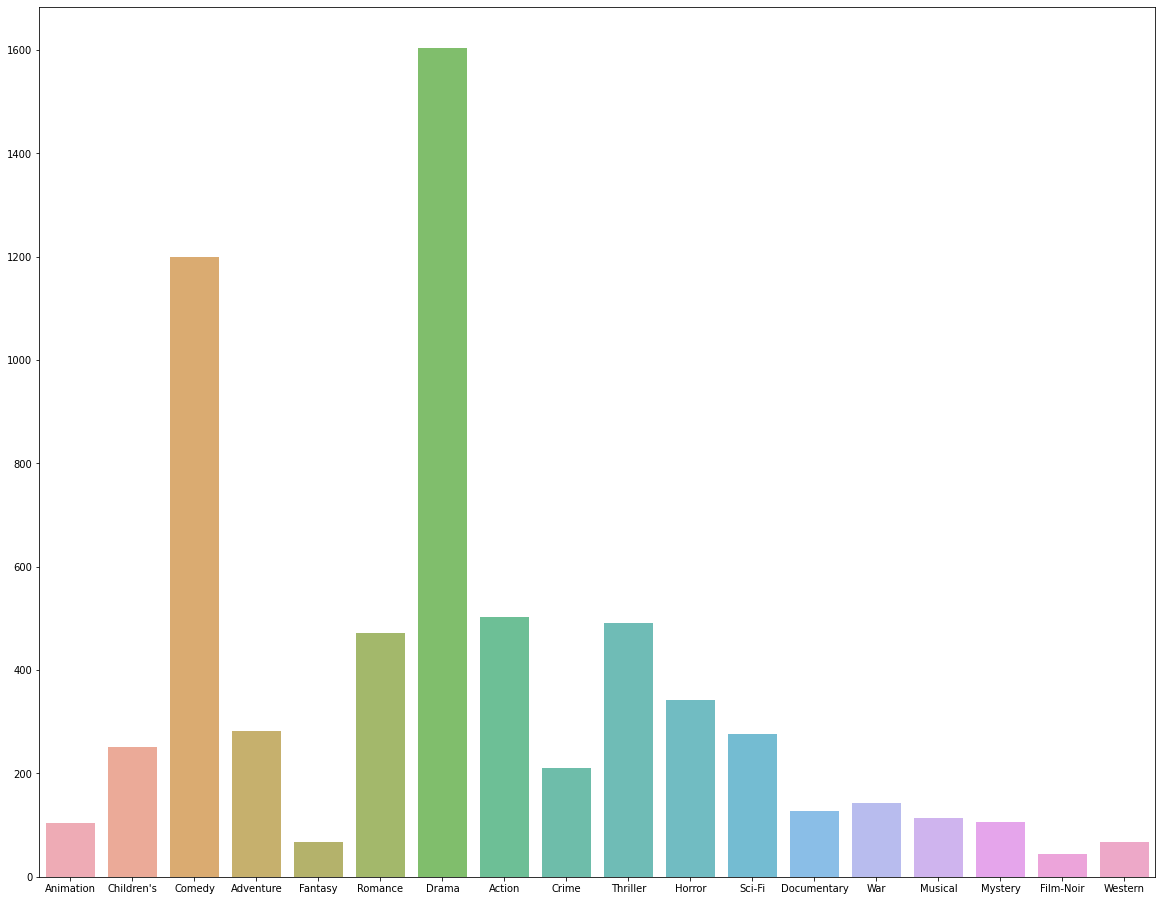

In [10]:
# 가장 많이 등장한 장르의 속성

unique_genre_dict = {}

for index, row in movie_data.iterrows():
  genre_combition = row['genre']
  parsed_genre = genre_combition.split("|")

  for genre in parsed_genre:
    if genre in unique_genre_dict:
      unique_genre_dict[genre] += 1
    else:
      unique_genre_dict[genre] = 1
  # 구분자 | 분리한 장르의 속성을 unique_genre_dict 각각 계산하여 저장한다.


plt.rcParams['figure.figsize'] = [20,16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.show()


In [11]:
#각 영화가 평가받은 횟수

movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values

print(movie_rate_count)

[280 103  92 ...   7   4  53]


In [12]:
plt.rcParams['figure.figsize'] = [8,8]

Total :  3883


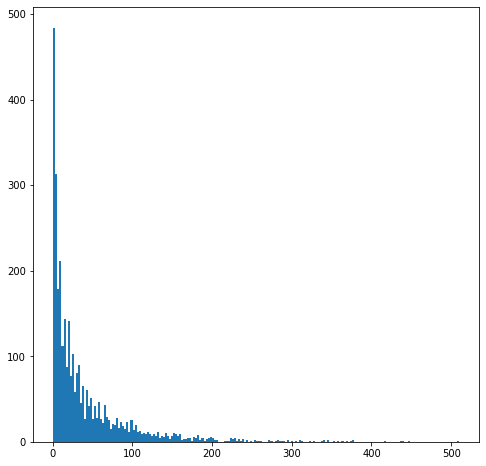

In [13]:
fig = plt.hist(movie_rate_count, bins = 200)
print("Total : ", len(movie_data['movie_id'].unique()))

In [24]:
# 각 영화당 평점
# movie_grouped = rating_data.groupby("movie_id")["rating"].agg({"rated_count" : "count", "rating_mean" : "mean"})

SpecificationError: ignored

In [23]:
# 영화 평점 예측

# user-movie를 표로 만들기

rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()

# 표 시각화

plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)

#대부분의 공간에 색이 없는 행렬(최소 행렬) 대부분의 Rating점수가 아직 채워지지 않았음을 의미

plt.show()

ValueError: ignored

Step 4: 수학적 기법 활용

1.회귀분석 2.시계열 3.수학적기법(행렬완성/행렬분석)

-행렬완성 : 행렬 분해 방법 사용

-행렬분해란? 수학적 성질을 이용해서 하나의 행렬을 여러개의 행렬 곱으로 나타내는 방법

-여기서는 행렬 분해중에서도 가장 많이 활용되는 '특이값 분해'(SVD) 방법을 활용할 것

ex) A행렬 = U행렬S행렬V행렬

1) 3개로 나눠진 행렬 u,s,v 의 값을 임의의 숫자/문자로 초기화 ex:?

2) 임의의 값으로 채워진 3개 행렬을 곱해서 새로운 행렬 A'를 계산한다.

3) 새롭게 만들어진 A'의 값 그리고 원래 행렬 A의 값을 비교

4) 이 값들이 최대한 비슷해지는 "?"를 학습한 뒤, 행렬 A'의 빈 공간에 채워 넣는다.


In [16]:
pip install surprise

     |████████████████████████████████| 11.8MB 3.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670961 sha256=05f0accfc2ee7e4f50894568a6fc2b47636003b5797d4f82896cfdb2264af244
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [17]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [18]:
#SVD 라이브러리를 사용하기 위해서 학습 데이터 생성

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data = data.build_full_trainset()


In [19]:
#SVD모델 학습

train_start = time.time()

model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("time : %.2f seconds"% (train_end - train_start))

time : 10.36 seconds


In [20]:
#학습한 모델의 평점 예측 결과를 보자

target_user_id = 4
target_user_data = rating_data[rating_data['user_id']== target_user_id]
target_user_data.head(10)

,user_id,movie_id,rating,time
233,4,3468.0,5.0,978294008.0
234,4,1210.0,3.0,978293924.0
235,4,2951.0,4.0,978294282.0
236,4,1214.0,4.0,978294260.0
237,4,1036.0,4.0,978294282.0
238,4,260.0,5.0,978294199.0
239,4,2028.0,5.0,978294230.0
240,4,480.0,4.0,978294008.0
241,4,1196.0,2.0,978294199.0
242,4,1198.0,5.0,978294199.0


In [21]:
# 4번 유저가 평가한 영화 목록 추출하기(movie_id : rating)

target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
  movie_id = row['movie_id']
  target_user_movie_rating_dict[movie_id]=row['rating']

print(target_user_movie_rating_dict)

{3468.0: 5.0, 1210.0: 3.0, 2951.0: 4.0, 1214.0: 4.0, 1036.0: 4.0, 260.0: 5.0, 2028.0: 5.0, 480.0: 4.0, 1196.0: 2.0, 1198.0: 5.0, 1954.0: 5.0, 1097.0: 4.0, 3418.0: 4.0, 3702.0: 4.0, 2366.0: 4.0, 1387.0: 5.0, 3527.0: 1.0, 1201.0: 5.0, 2692.0: 5.0, 2947.0: 5.0, 1240.0: 5.0}


In [22]:
#예측 모델에 4번 유저의 정보를 입력해서 '아직 보지도 않은 영화들의 평점'을 예측해 보자
#model.test()함수를 사용/ 입력은 리스트로 넣어준다.

test_data = []
for index, row in movie_data.iterrows():
  movie_id = row['movie_id']
  rating = 0
  if movie_id in target_user_movie_rating_dict:
    continue
  test_data.append((target_user_id, movie_id, rating))

target_user_predictions = model.test(test_data)
